In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("state.csv")
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
#pd.DataFrame.mean?
#pd.DataFrame.clip?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
State           50 non-null object
Population      50 non-null int64
Murder.Rate     50 non-null float64
Abbreviation    50 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [4]:
df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [5]:
from scipy.stats import trim_mean
df["Population"].mean(), trim_mean(df["Population"], proportiontocut=0.1), df["Population"].median()

(6162876.3, 4783697.125, 4436369.5)

In [6]:
(df["Murder.Rate"]*df["Population"]).sum()/df["Population"].sum()
#from numpy import mean

4.445833981123393

In [7]:


Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1
df["Population"].std(), IQR, df["Population"].mad()

(6848235.347401142, 4847308.0, 4450933.356000001)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eccf203dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1eccf21a4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eccf2039b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eccf21ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eccf21ae80>],
 'means': []}

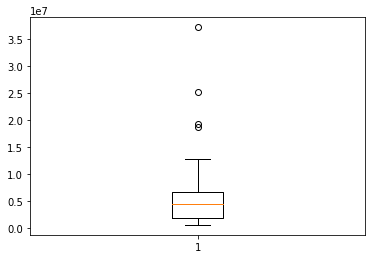

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df["Population"])

In [9]:
import numpy as np
np.bincount(df["Population"])

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#pd.cut?
freq_table = pd.cut(df["Population"], bins=np.arange(df["Population"].min(), df["Population"].max(), step=11)).value_counts()

freq_table

#np.bincount?
#df["Population"].max()-df["Population"].min()
df["Population"].hist(bins = np.arange(df["Population"].min(), df["Population"].max(), step=11))

In [10]:
df_air = pd.read_csv("airline_stats.csv")
df_air.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [11]:
df_air["airline"].value_counts()

Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: airline, dtype: int64

<BarContainer object of 3 artists>

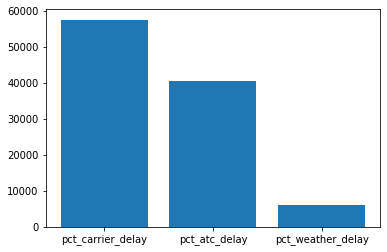

In [12]:
df_delta = df_air.groupby("airline").sum().loc["Delta"]
plt.bar(height=df_delta.values, x=df_delta.index)

In [13]:
df_tax = pd.read_csv("kc_tax.csv")
df_tax = df_tax[( (df_tax["TaxAssessedValue"] < 750000) & (df_tax["SqFtTotLiving"]>100) & (df_tax["SqFtTotLiving"]<3500) )]
df_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


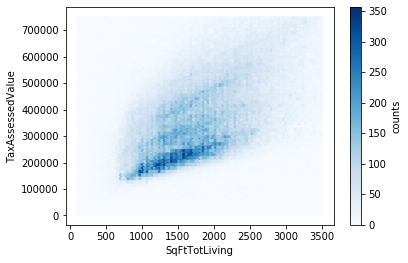

In [14]:
hb = plt.hexbin(x=df_tax["SqFtTotLiving"], y=df_tax["TaxAssessedValue"], cmap="Blues")
cb = plt.colorbar(hb)
plt.xlabel("SqFtTotLiving")
plt.ylabel("TaxAssessedValue")
cb.set_label("counts")

In [15]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432693 entries, 1 to 498248
Data columns (total 3 columns):
TaxAssessedValue    432693 non-null float64
SqFtTotLiving       432693 non-null int64
ZipCode             409456 non-null float64
dtypes: float64(2), int64(1)
memory usage: 13.2 MB


#plt.hexbin?
#plt.colormaps?
#plt.contourf([df_tax["SqFtTotLiving"]], [df_tax["TaxAssessedValue"]])
x = df_tax["SqFtTotLiving"][:1000]
y = df_tax["TaxAssessedValue"][:1000]
X, Y = np.meshgrid(x, y)
plt.contour(X, Y)

In [16]:
df_lc = pd.read_csv("lc_loans.csv")
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450961 entries, 0 to 450960
Data columns (total 2 columns):
status    450961 non-null object
grade     450961 non-null object
dtypes: object(2)
memory usage: 6.9+ MB


In [17]:
df_lc.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [30]:
pd.crosstab(index=df_lc["grade"], columns=df_lc["status"], normalize="columns")

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.068899,0.155832,0.209709,0.047911
B,0.233867,0.292205,0.320194,0.210032
C,0.265670,0.276875,0.237854,0.283686
D,0.220855,0.165889,0.140583,0.235775
E,0.125358,0.076713,0.061131,0.140362
F,0.067311,0.026290,0.023922,0.061906
G,0.018041,0.006196,0.006607,0.020329


In [38]:
import seaborn as sns
df_air.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


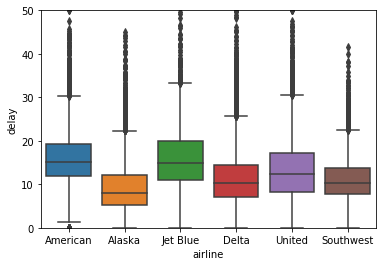

In [43]:
df_air["delay"] = df_air["pct_atc_delay"]+df_air["pct_carrier_delay"]+df_air["pct_weather_delay"]
plt.ylim(0, 50)
sns.boxplot(y="delay", x="airline", data=df_air)

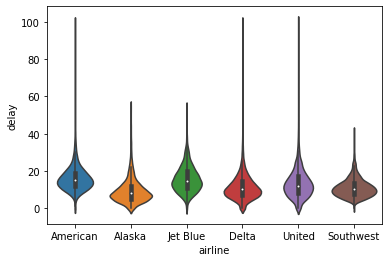

In [53]:
sns.violinplot(y="delay", x="airline", data=df_air)

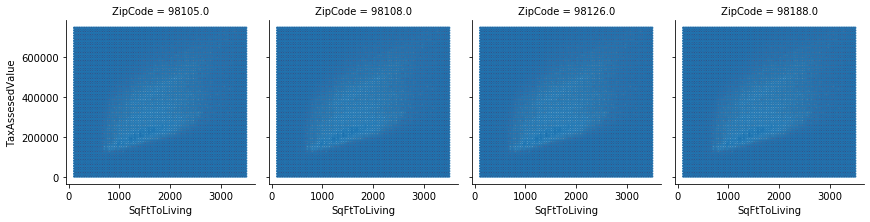

In [67]:
df_tax_zip = df_tax[df_tax["ZipCode"].isin([98188, 98105, 98108, 98126])]
g = sns.FacetGrid(df_tax_zip, col="ZipCode")
g = (g.map(plt.hexbin, x=df_tax["SqFtTotLiving"], y=df_tax["TaxAssessedValue"], cmap="RdBu", )
      .set_axis_labels("SqFtToLiving", "TaxAssesedValue"))

In [68]:
df_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
13,299000.0,2340,98108.0
93,179000.0,1200,98108.0
122,269000.0,1750,98126.0
128,198000.0,1090,98126.0
220,244000.0,1200,98108.0
